<a href="https://colab.research.google.com/github/aripenguin/Data602/blob/main/assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

I used the same dataset as my assignment 7 because the focus of this assignment is the visualization.  

The data I am using is Parks Inspection Program – Daily Immediate Attentions from NYC Open Data (https://data.cityofnewyork.us/City-Government/Parks-Inspection-Program-Daily-Immediate-Attention/s6dm-mdan/about_data). This dataset from the NYC Department of Parks and Recreation contains immediante attention hazards such as hateful graffiti or _. I choose this dataset because I wanted to put something from the NYC Open Data as local data sounded interesting to me. I wanted to look up datasets by departments and choose to check from Department of the Parks and Recreation because I am a big fan of the series Parks and Recreation. This one sound interesting and after downloading it, I really wanted to clean it up.

______________
# Data Exploration




In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/aripenguin/Data602/main/Parks_Inspection_Program___Daily_Immediate_Attentions_20240323.csv'
parks_hazards = pd.read_csv(url)

print("There are {} columns in this Daily Immediate Attentions dataset.".format(parks_hazards.shape[1]))
print("The column names are: {}".format(list(parks_hazards)))
print("There are {} rows in this Daily Immediate Attentions dataset.".format(parks_hazards.shape[0]))

<ipython-input-2-ac33202cb8c8>:4: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  parks_hazards = pd.read_csv(url)


There are 13 columns in this Daily Immediate Attentions dataset.
The column names are: ['Type', 'Inspection ID', 'Type Key', 'LastFieldInspectionDate', 'DateTimeEntered', 'iaAddedDate', 'OtherComments', 'Priority', 'Feature', 'WorkOrderNumber', 'Extended', 'SignedOff', 'orgtbl']
There are 94133 rows in this Daily Immediate Attentions dataset.


Below is an example of what the rows in the Daily Immediate Attentions dataset looks like.

As you can see, there are five columns (LastFieldInspectionDate, DateTimeEntered, OtherComments, WorkOrderNumber, SignedOff) that have some missing values.

Something else to note that can be cleaned is the last two columns (SignedOff, orgtbl). They hold the same data, whether or not the issue is resolved or not. This means they can be combined later.

In [3]:
print(parks_hazards.head)

<bound method NDFrame.head of       Type  Inspection ID  Type Key LastFieldInspectionDate  \
0       IA         176318    157665                     NaN   
1       IA         180483    161535                     NaN   
2       IA         177264    158684                     NaN   
3       IA         176927    158258                     NaN   
4       IA         141753    123269                     NaN   
...    ...            ...       ...                     ...   
94128   IA         181250    162221     2023-12-20T00:00:00   
94129   IA         181357    162341     2023-12-21T00:00:00   
94130   IA         181439    162417     2023-12-21T00:00:00   
94131   IA         181457    162434     2024-01-11T00:00:00   
94132   IA         181568    162522     2024-01-03T00:00:00   

               DateTimeEntered              iaAddedDate  \
0                          NaN  2023-04-13 23:00:00.000   
1                          NaN  2023-10-26 23:00:00.000   
2                          NaN  2023

Summary statistics
There isn't a lot of columns that would be worth doing numerical summary statistics in this dataset.

For the priority column, we have three options for data (Z, 1, 2).
First, I will change all the Z/zero priority to 0 and save all the data in this column to type integer so we can look at the mean, median, and quantiles.

In [4]:
parks_hazards.loc[parks_hazards['Priority'] == 'Z', 'Priority'] = 0
parks_hazards['Priority'] = pd.to_numeric(parks_hazards['Priority'], errors='coerce', downcast='integer')
#parks_hazards['Priority'] = parks_hazards['Priority'].astype(int)
print(parks_hazards.loc[101,:])

print("The mean of the Priority column: {}".format(parks_hazards['Priority'].mean()))
print("The median of the Priority column: {}".format(parks_hazards['Priority'].median()))
print("The quantiles of the Priority column: \n{}".format(parks_hazards['Priority'].quantile([.1, .25, .5, .75])))

Type                                      Graffiti
Inspection ID                                55038
Type Key                                    142577
LastFieldInspectionDate        2007-11-05T00:00:00
DateTimeEntered            2008-04-24 13:44:58.140
iaAddedDate                2022-05-03 23:00:00.000
OtherComments                                  NaN
Priority                                       0.0
Feature                                   Graffiti
WorkOrderNumber                                NaN
Extended                                     False
SignedOff                                     True
orgtbl                                    Resolved
Name: 101, dtype: object
The mean of the Priority column: 1.8791819980007232
The median of the Priority column: 2.0
The quantiles of the Priority column: 
0.10    2.0
0.25    2.0
0.50    2.0
0.75    2.0
Name: Priority, dtype: float64


# Data Wrangling  

Instead of working with 94,133 rows, I will subset this dataset to 10,000 rows to make it easier to work with.

In [5]:
#subset to 10,000
parks_hazards_subset = parks_hazards.sample(n = 10000)

print("1. Modify multiple column names.")
#organized the names of the date columns to match and DateTimeEntered did not describe the column well (column is for last action to address the hazard)
#Inspection ID and Type Key are modified to match the other names (no spaces)
parks_hazards_subset.rename(columns = {'DateTimeEntered':'LastActionDate', 'iaAddedDate':'AddedDate', 'Inspection ID':'InspectionID', 'Type Key':'TypeKey'}, inplace = True)
print(list(parks_hazards_subset))

print("\n2. Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.")
print(parks_hazards_subset.dtypes)
#Priority is set as a string but should be numeric
parks_hazards_subset['Priority'] = pd.to_numeric(parks_hazards_subset['Priority'], errors='coerce', downcast='integer')
#SignedOff is set as a string but should be a bool with the empty rows being False
parks_hazards_subset.loc[parks_hazards_subset['SignedOff'] != None, 'SignedOff'] = True
parks_hazards_subset['SignedOff'].fillna(False, inplace = True)
#all three date columns are not set as datetime
import datetime
parks_hazards_subset['LastFieldInspectionDate'] = pd.to_datetime(parks_hazards_subset['LastFieldInspectionDate'])
parks_hazards_subset['LastActionDate'] = pd.to_datetime(parks_hazards_subset['LastActionDate'])
parks_hazards_subset['AddedDate'] = pd.to_datetime(parks_hazards_subset['AddedDate'])
print(parks_hazards_subset.dtypes)

print("\n3. Fix missing and invalid values in data.")
print("Before fixing null values:\n{}".format(parks_hazards_subset.isnull().sum()))
#We already fixed SignedOff above, but LastFieldInspectionDate, LastActionDate, and OtherComments need
parks_hazards_subset['LastFieldInspectionDate'].fillna(parks_hazards_subset['LastActionDate'], inplace = True)
parks_hazards_subset['OtherComments'].fillna('N/A', inplace = True)
parks_hazards_subset['AddedDate'].fillna(parks_hazards_subset['LastActionDate'], inplace = True)
parks_hazards_subset['Feature'].fillna('N/A', inplace = True)
parks_hazards_subset['LastActionDate'].fillna(parks_hazards_subset['AddedDate'], inplace = True)
print("After fixing null values expect WorkOrderNumber:\n{}".format(parks_hazards_subset.isnull().sum()))

print("\n4. Create new columns based on existing columns or calculations.")
import datetime
#Add a column that shows the time between AddedDate to LastFieldInspectionDate: TimeSinceLastFieldInspection
parks_hazards_subset['TimeSinceLastFieldInspection'] = parks_hazards_subset['LastFieldInspectionDate'] - parks_hazards_subset['AddedDate']
#Add a column that shows the time between AddedDate to LastActionDate: TimeSinceLastAction
parks_hazards_subset['TimeSinceLastAction'] = parks_hazards_subset['LastActionDate'] - parks_hazards_subset['AddedDate']
#print(parks_hazards_subset.head(1))
print(parks_hazards_subset.sort_values(by = 'TimeSinceLastAction', ascending = False).head())

print("\n5. Drop column(s) from your dataset.")
print("There are {} columns in this dataset.".format(parks_hazards_subset.shape[1]))
#orgtbl holds the same data as SignedOff & WorkOrderNumber as very few rows use it (they can add it to OtherComments if there is one)
parks_hazards_subset['OtherComments'] = parks_hazards_subset['OtherComments'] + ' ' + parks_hazards_subset['WorkOrderNumber']
parks_hazards_subset.drop(['orgtbl', 'WorkOrderNumber'], axis=1, inplace=True)
print("There are {} columns after getting rid of orgtbl.".format(parks_hazards_subset.shape[1]))
print(list(parks_hazards_subset))

print("\n6. Drop a row(s) from your dataset.")
print("There are {} rows in this dataset.".format(parks_hazards_subset.shape[0]))
parks_hazards_subset = parks_hazards_subset.drop(parks_hazards_subset.index[[1,2,3]])
print("There are {} rows after the drop command.".format(parks_hazards_subset.shape[0]))

print("\n7. Sort your data based on multiple variables.")
print(parks_hazards_subset.sort_values(by = ['AddedDate', 'LastActionDate'], ascending = [True, False]).head(10))

print("\n8. Filter your data based on some condition.")
#I want to filter and save all non-SignedOff hazard rows
nonSignedOff = parks_hazards_subset.loc[parks_hazards_subset['SignedOff'] == False]
print("There is {} non-SignedOff hazards in this dataset.".format(nonSignedOff.shape[0]))
print(nonSignedOff.head())

print("\n9. Convert all the string values to upper or lower cases in one column.")
parks_hazards_subset['Type'] = parks_hazards_subset['Type'].str.lower()
print(parks_hazards_subset['Type'].head(5))

print("10. Check whether numeric values are present in a given column of your dataframe.")
priority_notnull = pd.to_numeric(parks_hazards_subset['Priority'], errors='coerce').notnull().all()
print("Are there numeric values in parks_hazards_subset['Priority']? {}".format(priority_notnull))

print("11. Group your dataset by one column, and get the mean, min, and max values by group: Groupby() & agg() or .apply()")
parks_hazards_types = parks_hazards_subset.groupby('Type')
print("The groups formed from grouping by Type are:\n{}".format(parks_hazards_types['Type'].unique()))
#get mean, min, and max values for Priority
types_priority = parks_hazards_types.agg({'Priority': ['mean','min', 'max']})
print("The mean, min, and max values of Priority by Type groups:\n{}".format(types_priority))
#get mean, min, and max values for TimeSinceLastFieldInspection
types_timeSinceLastFieldInspection = parks_hazards_types.agg({'TimeSinceLastFieldInspection': ['mean','min', 'max']})
print("The mean, min, and max values of TimeSinceLastFieldInspection by Type groups:\n{}".format(types_timeSinceLastFieldInspection))
#get mean, min, and max values for TimeSinceLastAction
types_timeSinceLastAction = parks_hazards_types.agg({'TimeSinceLastAction': ['mean','min', 'max']})
print("The mean, min, and max values of TimeSinceLastAction by Type groups:\n{}".format(types_timeSinceLastAction))


print("12. Group your dataset by two columns and then sort the aggregated results within the groups.")
parks_hazards_types_feature = parks_hazards_subset.groupby(['Type','Feature'], sort=True)
parks_hazards_types_feature_count = parks_hazards_types_feature[['Type','Feature']].size().reset_index().sort_values(['Type','Feature'], ascending = [True,False])
parks_hazards_types_feature_count.rename(columns={0:'Count'}, inplace = True)

print("The groups formed from grouping by Type then Feature are:\n{}".format(parks_hazards_types_feature_count))



1. Modify multiple column names.
['Type', 'InspectionID', 'TypeKey', 'LastFieldInspectionDate', 'LastActionDate', 'AddedDate', 'OtherComments', 'Priority', 'Feature', 'WorkOrderNumber', 'Extended', 'SignedOff', 'orgtbl']

2. Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.
Type                        object
InspectionID                 int64
TypeKey                      int64
LastFieldInspectionDate     object
LastActionDate              object
AddedDate                   object
OtherComments               object
Priority                   float64
Feature                     object
WorkOrderNumber             object
Extended                      bool
SignedOff                   object
orgtbl                      object
dtype: object
Type                               object
InspectionID                        int64
TypeKey                             int64
LastFieldInspectionDate    datetime6

# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



In [6]:
print(parks_hazards_subset.head(1))

      Type  InspectionID  TypeKey LastFieldInspectionDate  \
76802   ia        160072   140839              2022-03-27   

               LastActionDate           AddedDate OtherComments  Priority  \
76802 2022-03-28 09:36:29.780 2022-03-25 23:00:00           NaN       2.0   

               Feature  Extended SignedOff TimeSinceLastFieldInspection  \
76802  Athletic Fields     False      True              1 days 01:00:00   

         TimeSinceLastAction  
76802 2 days 10:36:29.780000  


Above is a single row from our new dataset, parks_hazards_subset that was created after data wrangling.

In my last assignment's conclusion, I mentioned wanting to explore the relationship between the response times between different time periods/years or different types of hazards. This is what I will focus my visuals/plots on.  



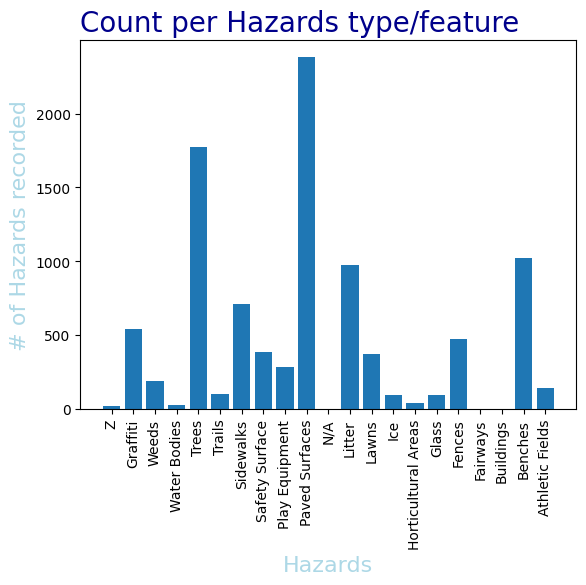

In [7]:
import matplotlib.pyplot as plt

#plt.bar(parks_hazards_types_feature_count[parks_hazards_types_feature_count['Count'] >= 100].Feature, parks_hazards_types_feature_count[parks_hazards_types_feature_count['Count'] >= 100].Count)
plt.bar(parks_hazards_types_feature_count.Feature, parks_hazards_types_feature_count.Count)
plt.title('Count per Hazards type/feature', loc='left', size=20, color='darkblue')
label_font = {'color':'lightblue','size':16}
plt.xlabel('Hazards', fontdict = label_font)
plt.ylabel('# of Hazards recorded', fontdict = label_font)
plt.xticks(rotation=90)
plt.show()

Looking at the bar plot above, I want to work with paved surfaces for testing response times because we have the most cases/rows for this feature.

80056     6
30341    18
48618     7
87659    99
39732    10
         ..
74234     8
21600    26
91476     5
51100     5
16588     1
Name: TimeSinceLastAction, Length: 2066, dtype: int64


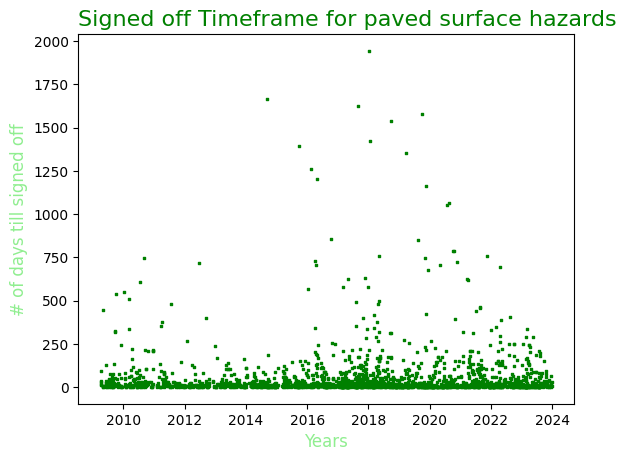

In [11]:
paved_surfaces = parks_hazards_subset[(parks_hazards_subset['Feature'] == 'Paved Surfaces') &
                                      (parks_hazards_subset['SignedOff'] == True) &
                                      (parks_hazards_subset['TimeSinceLastAction'].dt.days != 0)]
#print(paved_surfaces.dtypes)
#print(paved_surfaces['TimeSinceLastAction'].dt.days)

plt.scatter(paved_surfaces['AddedDate'], paved_surfaces['TimeSinceLastAction'].dt.days, c='g',s=1, marker='s')
plt.title('Signed off Timeframe for paved surface hazards', loc='left', size=16, color='green')
label_font = {'color':'lightgreen','size':12}
plt.xlabel('Years', fontdict = label_font)
plt.ylabel('# of days till signed off', fontdict = label_font)
plt.show()

The scatter plot above graphes the data of the record hazard to the amount of days that has passed from then to the last recorded action for that hazard. This is done specifically for data/recorded hazards that were about paved surfaces and signed off. (This is assuming the last action on a signed off case would be the signed off notice. I also eliminated the records were the last action date was 0 for no action since creating the record was done) This was to decide whether or not, over the years, the  Parks and Recreation department has gotten better/faster at dealing with these hazards. From the plot, it does not appear this is not the case if not it is slightly the opposite. The majority of cases are still solved in the same timeframe but there are more outliners/cases taking longer than the norm as the years go by.  

To add on this scatter plot, paved surfaces is a feature for the hazard type, ia. Now I wish to graph the same x and y but for some of the ia hazard type cases to see how the department is doing across the board with these. So that the scatter plot is not too crazy to read, I will be graphing 6 of the 18 ia hazard type cases that had/are closer to the average number of counts.

   Type              Feature  Count
6    ia             Fairways      1
13   ia                  N/A      3
5    ia            Buildings      5
20   ia         Water Bodies     29
9    ia  Horticultural Areas     46
10   ia                  Ice     96
8    ia                Glass     97
18   ia               Trails    102
3    ia      Athletic Fields    141
21   ia                Weeds    195
15   ia       Play Equipment    288
11   ia                Lawns    375
16   ia       Safety Surface    389
7    ia               Fences    479
17   ia            Sidewalks    711
12   ia               Litter    974
4    ia              Benches   1022
19   ia                Trees   1772
14   ia       Paved Surfaces   2380


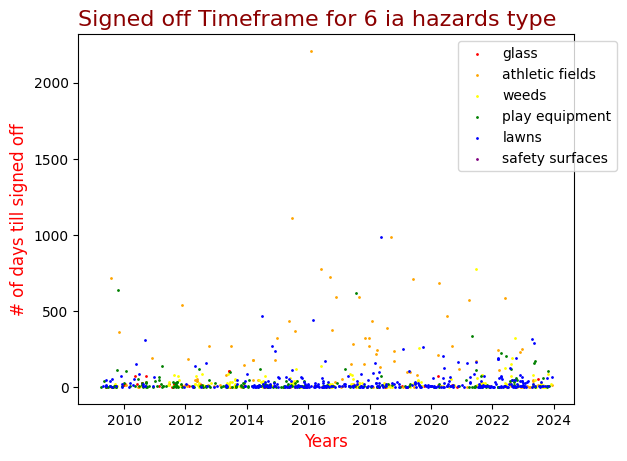

In [9]:
print(parks_hazards_types_feature_count[parks_hazards_types_feature_count['Type']=='ia'].sort_values('Count', ascending = True))
#to graph: glass, athletic fields, weeds, play equipment, lawns, safety surfaces

glass = parks_hazards_subset[(parks_hazards_subset['Feature'] == 'Glass') &
                              (parks_hazards_subset['SignedOff'] == True) &
                              (parks_hazards_subset['TimeSinceLastAction'].dt.days != 0)]
athletic_fields = parks_hazards_subset[(parks_hazards_subset['Feature'] == 'Athletic Fields') &
                              (parks_hazards_subset['SignedOff'] == True) &
                              (parks_hazards_subset['TimeSinceLastAction'].dt.days != 0)]
weeds = parks_hazards_subset[(parks_hazards_subset['Feature'] == 'Weeds') &
                              (parks_hazards_subset['SignedOff'] == True) &
                              (parks_hazards_subset['TimeSinceLastAction'].dt.days != 0)]
play_equipment = parks_hazards_subset[(parks_hazards_subset['Feature'] == 'Play Equipment') &
                              (parks_hazards_subset['SignedOff'] == True) &
                              (parks_hazards_subset['TimeSinceLastAction'].dt.days != 0)]
lawns = parks_hazards_subset[(parks_hazards_subset['Feature'] == 'Lawns') &
                              (parks_hazards_subset['SignedOff'] == True) &
                              (parks_hazards_subset['TimeSinceLastAction'].dt.days != 0)]
safety_surfaces = parks_hazards_subset[(parks_hazards_subset['Feature'] == 'Safety Surfaces') &
                              (parks_hazards_subset['SignedOff'] == True) &
                              (parks_hazards_subset['TimeSinceLastAction'].dt.days != 0)]

plt.scatter(glass['AddedDate'], glass['TimeSinceLastAction'].dt.days, label = 'glass', c='red', s=1)
plt.scatter(athletic_fields['AddedDate'], athletic_fields['TimeSinceLastAction'].dt.days, label = 'athletic fields', c='orange', s=1)
plt.scatter(weeds['AddedDate'], weeds['TimeSinceLastAction'].dt.days, label = 'weeds', c='yellow', s=1)
plt.scatter(play_equipment['AddedDate'], play_equipment['TimeSinceLastAction'].dt.days, label = 'play equipment', c='green', s=1)
plt.scatter(lawns['AddedDate'], lawns['TimeSinceLastAction'].dt.days, label = 'lawns', c='blue', s=1)
plt.scatter(safety_surfaces['AddedDate'], safety_surfaces['TimeSinceLastAction'].dt.days, label = 'safety surfaces', c='purple', s=1)

plt.title('Signed off Timeframe for 6 ia hazards type', loc='left', size=16, color='darkred')
label_font = {'color':'red','size':12}
plt.xlabel('Years', fontdict = label_font)
plt.ylabel('# of days till signed off', fontdict = label_font)
plt.legend(bbox_to_anchor=(1.1, 1))
plt.show()


Now that I have created my three graphs in matplotlib for exploration. This next section will be me recreating them in seaborn.

<ipython-input-29-e916c4508d38>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(labels=parks_hazards_types_feature_count['Feature'], rotation=90)
<ipython-input-29-e916c4508d38>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paved_surfaces['TimeSinceLastAction_Days'] = paved_surfaces['TimeSinceLastAction'].dt.days
<ipython-input-29-e916c4508d38>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  glass['TimeSinceLastAction_Days'] = glass['TimeSinceLastActio

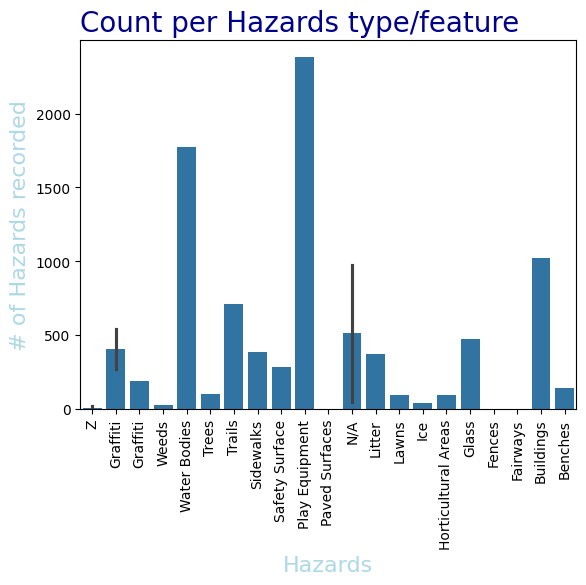

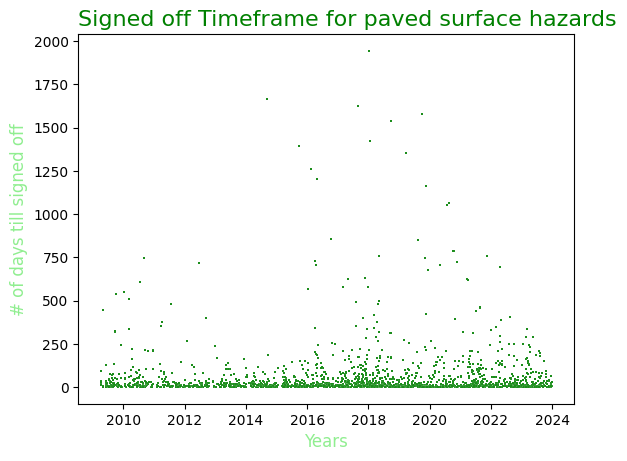

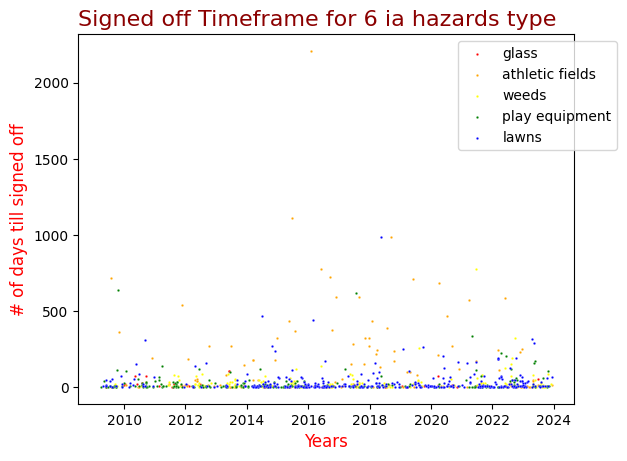

In [29]:
import seaborn as sns
#Bar plot
b = sns.barplot(x='Feature',y='Count', data=parks_hazards_types_feature_count)
b.set_xticklabels(labels=parks_hazards_types_feature_count['Feature'], rotation=90)
b.set_xlabel('Hazards',size=16, color='lightblue')
b.set_ylabel('# of Hazards recorded',size=16, color='lightblue')
b.set_title('Count per Hazards type/feature',loc='left', size=20, color='darkblue')

#Scatter plot 1 - using the paved_surfaces subset I created before
plt.figure()

#in matplotlib, I could do the .dt.days to get just the days from 'TimeSinceLastAction' in the plotting command, but it seems I can't in seaborn
paved_surfaces['TimeSinceLastAction_Days'] = paved_surfaces['TimeSinceLastAction'].dt.days

s1 = sns.scatterplot(x='AddedDate',y='TimeSinceLastAction_Days',data=paved_surfaces, c='g', s=1, marker='s')
s1.set_xlabel('Years',size=12, color='lightgreen')
s1.set_ylabel('# of days till signed off',size=12, color='lightgreen')
s1.set_title('Signed off Timeframe for paved surface hazards', loc='left', size=16, color='green')

#Scatter plot 2 - using the glass, athletic_fields, weeds, play_equipment, lawns, and safety_surfaces subsets I created before
plt.figure()

glass['TimeSinceLastAction_Days'] = glass['TimeSinceLastAction'].dt.days
athletic_fields['TimeSinceLastAction_Days'] = athletic_fields['TimeSinceLastAction'].dt.days
weeds['TimeSinceLastAction_Days'] = weeds['TimeSinceLastAction'].dt.days
play_equipment['TimeSinceLastAction_Days'] = play_equipment['TimeSinceLastAction'].dt.days
lawns['TimeSinceLastAction_Days'] = lawns['TimeSinceLastAction'].dt.days
safety_surfaces['TimeSinceLastAction_Days'] = safety_surfaces['TimeSinceLastAction'].dt.days


s2 = sns.scatterplot(x='AddedDate',y='TimeSinceLastAction_Days', data=glass, label = 'glass', c='red', s=3)
sns.scatterplot(x='AddedDate',y='TimeSinceLastAction_Days',data=athletic_fields, label = 'athletic fields', c='orange', s=3)
sns.scatterplot(x='AddedDate',y='TimeSinceLastAction_Days',data=weeds, label = 'weeds', c='yellow', s=3)
sns.scatterplot(x='AddedDate',y='TimeSinceLastAction_Days',data=play_equipment, label = 'play equipment', c='green', s=3)
sns.scatterplot(x='AddedDate',y='TimeSinceLastAction_Days',data=lawns, label = 'lawns', c='blue', s=3)
sns.scatterplot(x='AddedDate',y='TimeSinceLastAction_Days',data=safety_surfaces, label = 'safety surfaces', c='purple', s=3)

s2.set_xlabel('Years',size=12, color='red')
s2.set_ylabel('# of days till signed off',size=12, color='red')
s2.set_title('Signed off Timeframe for 6 ia hazards type', loc='left', size=16, color='darkred')
plt.legend(bbox_to_anchor=(1.1, 1))


I was able to recreate all three matplotlib plots in seaborn, however, I prefer doing it in matplotlib. There was too many changes in structuring it in seaborn, but there are a few things that made seaborn noticeable harder.  

For the bar plot, some of the bars have this weird black line in it that I do not know how to get rid of. Visually, the matplotlib showed more details or for example, the 'z' hazard feature, you can see a the small count that it has better in matplotlib than in seaborn.   

For the scatter plot #1, the biggest change was I could not do the calculation to only graph the days from 'TimeSinceLastAction' (with .dt.days) in the plotting command sns.scatterplot like I could in plt.scatter. I ended up saving the days only in a new column in the dataset as a work around.  

For the scatter plot #2, I ran into the same issue as scatter plot #1 and also with the legend. I could not find a way to show and move the legend box with only seaborn. I ended up using the matplotlib plt.legend.  

Overall, making plots in matplotlib and seaborn do not differ to wildly, however, I would prefer to use just matplotlib. I have prior experience in it and have not the benefits of seaborn as you could do the same things in matplotlib as you can in seaborn.



# Conclusions  

In the visualization section, I focused on the main unanswered questions I had from the data wrangling: if the department has improved the speed in which they handle hazards and are different hazards easier or harder to deal with. From the graphs I have made, I can conclude that the department got slightly worse with handling hazards as we can see more cases taking longer than usual. From the last graph, we can see that along the 6 ia hazard type cases, they don't differ that much in terms of timeframe.  

My two conclusions from this is that the department might have been affected from the panademic or recent events that cause a few more hazards to take longer to be dealt with and that the hazard type does not matter for timeframes as the process is probably close to the same meaning the timeframes to fix different hazards are the same.